In [211]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

Genero el dataset

In [212]:
class Datos(Dataset):
    def __init__(self):
        self.x = torch.linspace(0, 4, 10000).view(-1,1)
        self.y = -(self.x-2)**2 +3 + 0.2 * torch.sin(16 * self.x)
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

Defino el modelo

In [213]:
class Modelo(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.hidden_linear = nn.Linear(1,8)
        self.output_linear = nn.Linear(8,1)
        
    def forward(self, input):
        hidden_layer = self.hidden_linear(input)
        activated_layer = torch.sigmoid(hidden_layer)
        output_layer = self.output_linear(activated_layer)
        return output_layer
    
model = Modelo()

In [214]:
def Plotter(X, Y, model = None):
    if model!= None:
        plt.subplot(2,2,1)
        plt.scatter(X.numpy(), Y.numpy(), color = 'red', label = 'Dataset')
        plt.plot(X.numpy(), model(X).detach().numpy(), color = 'green', label = 'Y_hat')
    Axis=plt.legend()
    plt.show()

In [215]:
def train(data_set, model, criterion, train_loader, optimizer, epochs, plot_number):
    cost = []
    
    for epoch in range(epochs):
        cum_loss = 0
        
        for x, y in train_loader:

            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat,y)
            loss.backward()
            optimizer.step()
            cum_loss+= loss.item()
            
        if epoch%plot_number == 0:
            Plotter(data_set.x, data_set.y, model)
        
        cost.append(cum_loss)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()
    return cost

In [216]:
data_set = Datos()
learning_rate = 0.005
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set,batch_size = 250)

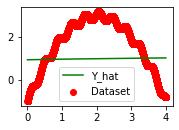

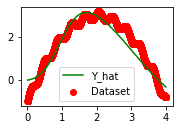

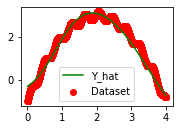

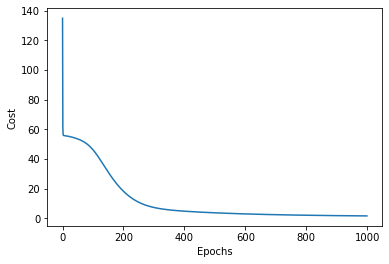

In [217]:
COST=train(data_set,model, criterion, train_loader, optimizer, epochs=1000, plot_number=400)